In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import time
import random
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [3]:
top50_january_df = pd.read_csv("top50_january_vs_Feb_to_Dec.csv")

In [5]:
top50_january_df

,ticker,Jan_return,year,Annual_return,Feb_to_Dec_return
0,GR,0.222222,2005,0.703704,0.393939
1,AAPL,0.194099,2005,1.232609,0.869701
2,WEN,0.192307,2005,0.311356,0.099847
3,PBG,0.160675,2005,0.784355,0.537342
4,HUM,0.154261,2005,0.829909,0.585351
...,...,...,...,...,...
1044,STLD,0.123871,2025,0.516633,0.349472
1045,LRCX,0.122110,2025,1.427959,1.163744
1046,WFC,0.121868,2025,0.371859,0.222835
1047,SOLV,0.121102,2025,0.213442,0.082366


In [7]:
annual_higher = (top50_january_df["Annual_return"] > top50_january_df["Jan_return"]).sum()
january_higher = (top50_january_df["Jan_return"] > top50_january_df["Annual_return"]).sum()
equal_returns = (top50_january_df["Annual_return"] == top50_january_df["Jan_return"]).sum()  # opcjonalnie

print(f"Liczba spółek, w których roczna stopa zwrotu była wyższa niż styczeń: {annual_higher}")
print(f"Liczba spółek, w których styczeń był wyższy niż roczny wynik: {january_higher}")
print(f"Liczba spółek z równymi stopami zwrotu: {equal_returns}")

Liczba spółek, w których roczna stopa zwrotu była wyższa niż styczeń: 671
Liczba spółek, w których styczeń był wyższy niż roczny wynik: 378
Liczba spółek z równymi stopami zwrotu: 0


In [9]:
#liczymy zwrot w okresie luty-grudzien
top50_january_df["Feb_to_Dec_return"] = (
    (1 + top50_january_df["Annual_return"]) / (1 + top50_january_df["Jan_return"]) - 1
)

In [11]:
top50_january_df

,ticker,Jan_return,year,Annual_return,Feb_to_Dec_return
0,GR,0.222222,2005,0.703704,0.393939
1,AAPL,0.194099,2005,1.232609,0.869701
2,WEN,0.192307,2005,0.311356,0.099847
3,PBG,0.160675,2005,0.784355,0.537342
4,HUM,0.154261,2005,0.829909,0.585351
...,...,...,...,...,...
1044,STLD,0.123871,2025,0.516633,0.349472
1045,LRCX,0.122110,2025,1.427959,1.163744
1046,WFC,0.121868,2025,0.371859,0.222835
1047,SOLV,0.121102,2025,0.213442,0.082366


In [13]:
top50_january_df["Feb_to_Dec_return"].sort_values(ascending=False)

224    1.963045
202    1.860216
410    1.817461
903    1.535904
400    1.516661
         ...   
193   -0.805045
186   -0.808367
249   -0.820513
179   -0.890265
301   -0.925000
Name: Feb_to_Dec_return, Length: 1049, dtype: float64

In [15]:
top50_january_df.describe()

,Jan_return,year,Annual_return,Feb_to_Dec_return
count,1049.000000,1049.000000,1049.000000,1049.000000
mean,0.142248,2015.008580,0.274185,0.114142
std,0.121910,6.054691,0.464209,0.356349
min,0.020183,2005.000000,-0.900000,-0.925000
25%,0.081833,2010.000000,0.026589,-0.095944
50%,0.118062,2015.000000,0.225622,0.099295
75%,0.173363,2020.000000,0.451576,0.291988
max,2.000000,2025.000000,5.714286,1.963045


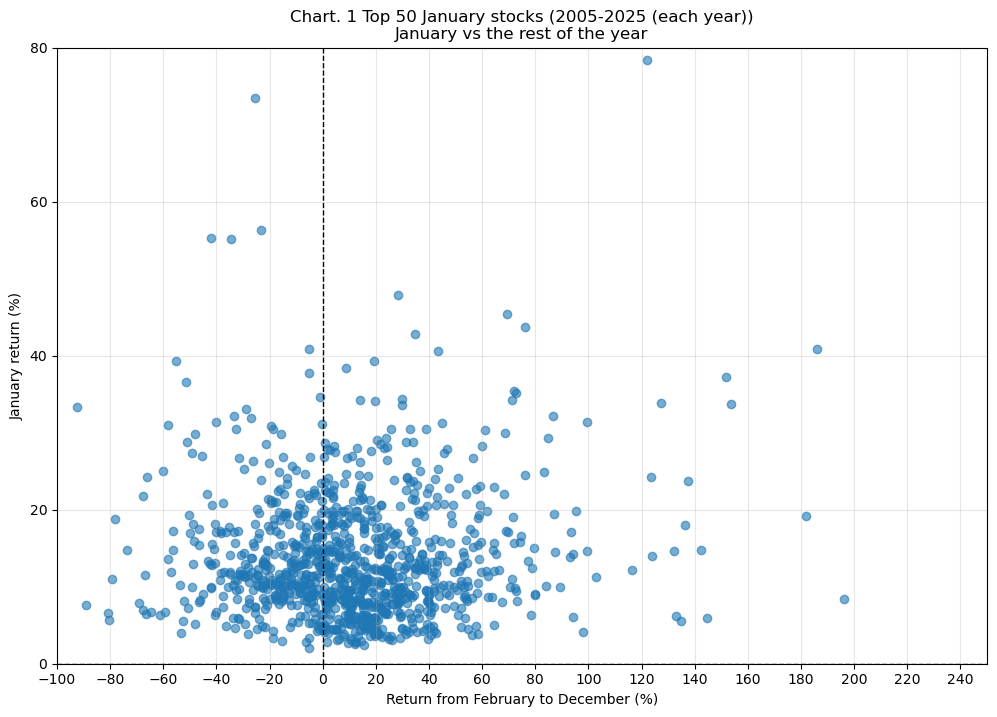

In [17]:
# kopiujemy dane z top50_january_df do df_trim
df_trim = top50_january_df.copy()

# tworzymy kolumny w procentach
df_trim["Feb_to_Dec_return_pct"] = df_trim["Feb_to_Dec_return"] * 100
df_trim["Jan_return_pct"] = df_trim["Jan_return"] * 100

# Zakresy osi
xmin, xmax = -100, 250
ymin, ymax = 0, 80

plt.figure(figsize=(12,8))

# Scatter plot bez kolorowania
plt.scatter(
    df_trim["Feb_to_Dec_return_pct"],
    df_trim["Jan_return_pct"],
    alpha=0.6
)

# Linie odniesienia na 0
plt.axhline(0, color="black", linestyle="--", linewidth=1)
plt.axvline(0, color="black", linestyle="--", linewidth=1)

# Skale
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)

# Podział osi co 20 jednostek
plt.xticks(np.arange(xmin, xmax+1, 20))
plt.yticks(np.arange(ymin, ymax+1, 20))

plt.xlabel("Return from February to December (%)")
plt.ylabel("January return (%)")
plt.title("Chart. 1 Top 50 January stocks (2005-2025 (each year))\nJanuary vs the rest of the year")
plt.grid(alpha=0.3)
plt.show()

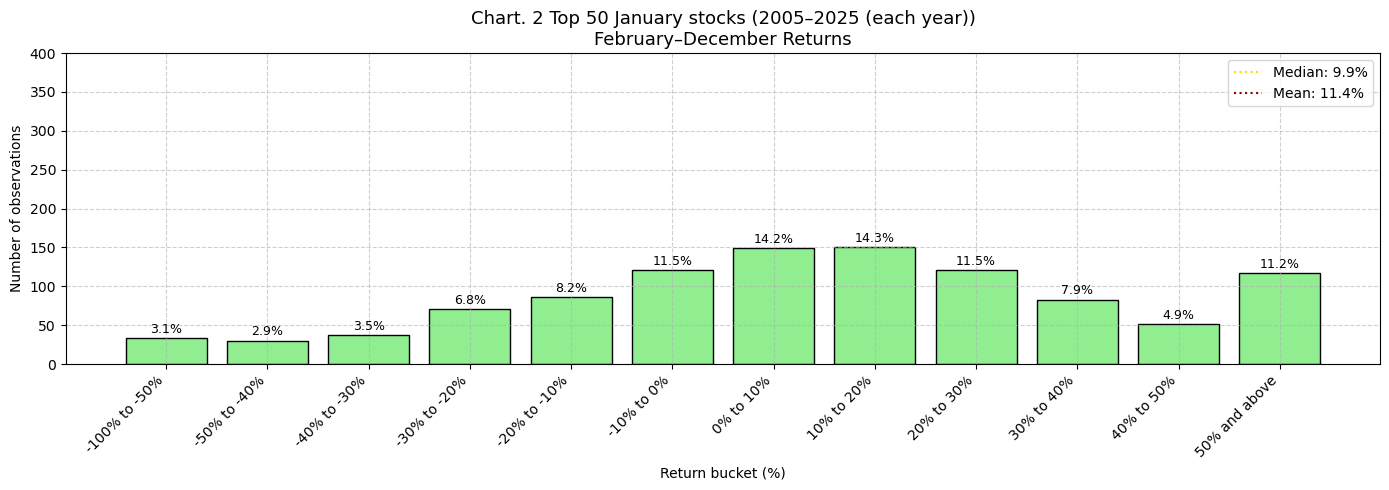

In [19]:
#tworzymy koszyki
bins = [-100, -50, -40, -30, -20, -10, 0, 10, 20, 30, 40, 50, np.inf]

labels = [
    f'{bins[i]}% to {bins[i+1]}%' if bins[i+1] != np.inf
    else f'{bins[i]}% and above'
    for i in range(len(bins) - 1)
]

def prepare_hist_data(data):
    categories = pd.cut(
        data.dropna(),
        bins=bins,
        labels=labels,
        right=False
    )
    return categories.value_counts().sort_index()

data = df_trim["Feb_to_Dec_return_pct"]

counts = prepare_hist_data(data)
median_val = data.median()
mean_val = data.mean()

plt.figure(figsize=(14, 5))
ax = plt.gca()

ax.bar(
    range(len(counts)),
    counts.values,
    color='lightgreen',
    edgecolor='black'
)

ax.set_title(
    'Chart. 2 Top 50 January stocks (2005–2025 (each year))\nFebruary–December Returns',
    fontsize=13
)
ax.set_xlabel('Return bucket (%)')
ax.set_ylabel('Number of observations')

ax.set_xticks(range(len(counts)))
ax.set_xticklabels(counts.index, rotation=45, ha='right')

total = counts.sum()
ymax = min(400, counts.max())

for i, val in enumerate(counts.values):
    pct = val / total * 100
    ax.text(
        i,
        min(val + ymax * 0.02, 395),
        f'{pct:.1f}%',
        ha='center',
        va='bottom',
        fontsize=9
    )

ax.plot([], [], color='gold', linestyle=':',
        label=f'Median: {median_val:.1f}%')

ax.plot([], [], color='darkred', linestyle=':',
        label=f'Mean: {mean_val:.1f}%')

ax.legend()

ax.set_ylim(0, 400)
ax.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

In [21]:
index_ticker = "^GSPC"
years = range(2005, 2026)

sp500_returns = {}

for year in years:
    start = f"{year}-01-31"
    end = f"{year}-12-31"
    
    prices = yf.download(tickers=index_ticker, start=start, end=end, progress=False)
    
    if prices.empty:
        sp500_returns[year] = None
        print(f"Brak danych dla {year}")
        continue
    
    jan_close = float(prices.loc[prices.index >= start, "Close"].iloc[0])
    
    dec_close = float(prices["Close"].iloc[-1])
    
    sp500_returns[year] = (dec_close / jan_close - 1) * 100

sp500_returns_df = pd.DataFrame({
    "year": list(sp500_returns.keys()),
    "SP500_Feb_to_Dec": list(sp500_returns.values())
})

print(sp500_returns_df)

C:\Users\lukas\AppData\Local\Temp\ipykernel_6500\1778103135.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  prices = yf.download(tickers=index_ticker, start=start, end=end, progress=False)
C:\Users\lukas\AppData\Local\Temp\ipykernel_6500\1778103135.py:17: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  jan_close = float(prices.loc[prices.index >= start, "Close"].iloc[0])
C:\Users\lukas\AppData\Local\Temp\ipykernel_6500\1778103135.py:19: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  dec_close = float(prices["Close"].iloc[-1])
C:\Users\lukas\AppData\Local\Temp\ipykernel_6500\1778103135.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  prices = yf.download(tickers=index_ticker, start=start, end=end, progress=False)
C:\Use

    year  SP500_Feb_to_Dec
0   2005          5.673556
1   2006         10.797770
2   2007          2.798559
3   2008        -35.392987
4   2009         36.462982
5   2010         15.487663
6   2011         -2.217524
7   2012          6.859138
8   2013         22.892843
9   2014         16.703793
10  2015          2.103577
11  2016         15.440505
12  2017         17.321741
13  2018        -11.972125
14  2019         19.126139
15  2020         15.703515
16  2021         26.627110
17  2022        -14.971594
18  2023         17.005101
19  2024         21.901913
20  2025         14.166149


C:\Users\lukas\AppData\Local\Temp\ipykernel_6500\1778103135.py:17: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  jan_close = float(prices.loc[prices.index >= start, "Close"].iloc[0])
C:\Users\lukas\AppData\Local\Temp\ipykernel_6500\1778103135.py:19: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  dec_close = float(prices["Close"].iloc[-1])
C:\Users\lukas\AppData\Local\Temp\ipykernel_6500\1778103135.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  prices = yf.download(tickers=index_ticker, start=start, end=end, progress=False)
C:\Users\lukas\AppData\Local\Temp\ipykernel_6500\1778103135.py:17: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  jan_close = float(pric

In [23]:
sp500_returns_df

,year,SP500_Feb_to_Dec
0,2005,5.673556
1,2006,10.797770
2,2007,2.798559
3,2008,-35.392987
4,2009,36.462982
5,2010,15.487663
6,2011,-2.217524
7,2012,6.859138
8,2013,22.892843
9,2014,16.703793


In [25]:
df_trim

,ticker,Jan_return,year,Annual_return,Feb_to_Dec_return,Feb_to_Dec_return_pct,Jan_return_pct
0,GR,0.222222,2005,0.703704,0.393939,39.393939,22.222218
1,AAPL,0.194099,2005,1.232609,0.869701,86.970101,19.409950
2,WEN,0.192307,2005,0.311356,0.099847,9.984720,19.230741
3,PBG,0.160675,2005,0.784355,0.537342,53.734220,16.067541
4,HUM,0.154261,2005,0.829909,0.585351,58.535144,15.426051
...,...,...,...,...,...,...,...
1044,STLD,0.123871,2025,0.516633,0.349472,34.947232,12.387122
1045,LRCX,0.122110,2025,1.427959,1.163744,116.374398,12.211004
1046,WFC,0.121868,2025,0.371859,0.222835,22.283457,12.186787
1047,SOLV,0.121102,2025,0.213442,0.082366,8.236573,12.110203


In [27]:
mean_stock_returns = df_trim.groupby("year")["Feb_to_Dec_return_pct"].mean().reset_index()
mean_stock_returns.rename(columns={"Feb_to_Dec_return_pct": "Mean_Feb_to_Dec"}, inplace=True)

# łączymy z danymi S&P 500
comparison_df = pd.merge(mean_stock_returns, sp500_returns_df, on="year", how="left")

print(comparison_df)

    year  Mean_Feb_to_Dec  SP500_Feb_to_Dec
0   2005        20.865288          5.673556
1   2006         3.891300         10.797770
2   2007        -4.670072          2.798559
3   2008       -41.886048        -35.392987
4   2009        41.232331         36.462982
5   2010        14.366919         15.487663
6   2011       -13.037985         -2.217524
7   2012         7.666024          6.859138
8   2013        40.328933         22.892843
9   2014        24.550631         16.703793
10  2015        10.458671          2.103577
11  2016         8.101846         15.440505
12  2017        25.951222         17.321741
13  2018        -9.101668        -11.972125
14  2019        17.119549         19.126139
15  2020         9.625653         15.703515
16  2021        26.025967         26.627110
17  2022         7.656251        -14.971594
18  2023        18.514792         17.005101
19  2024        19.451932         21.901913
20  2025        12.436910         14.166149


In [29]:
comparison_df.describe()

,year,Mean_Feb_to_Dec,SP500_Feb_to_Dec
count,21.000000,21.000000,21.000000
mean,2015.000000,11.407069,9.643706
std,6.204837,18.422157,15.940596
min,2005.000000,-41.886048,-35.392987
25%,2010.000000,7.656251,2.798559
50%,2015.000000,12.436910,15.440505
75%,2020.000000,20.865288,17.321741
max,2025.000000,41.232331,36.462982


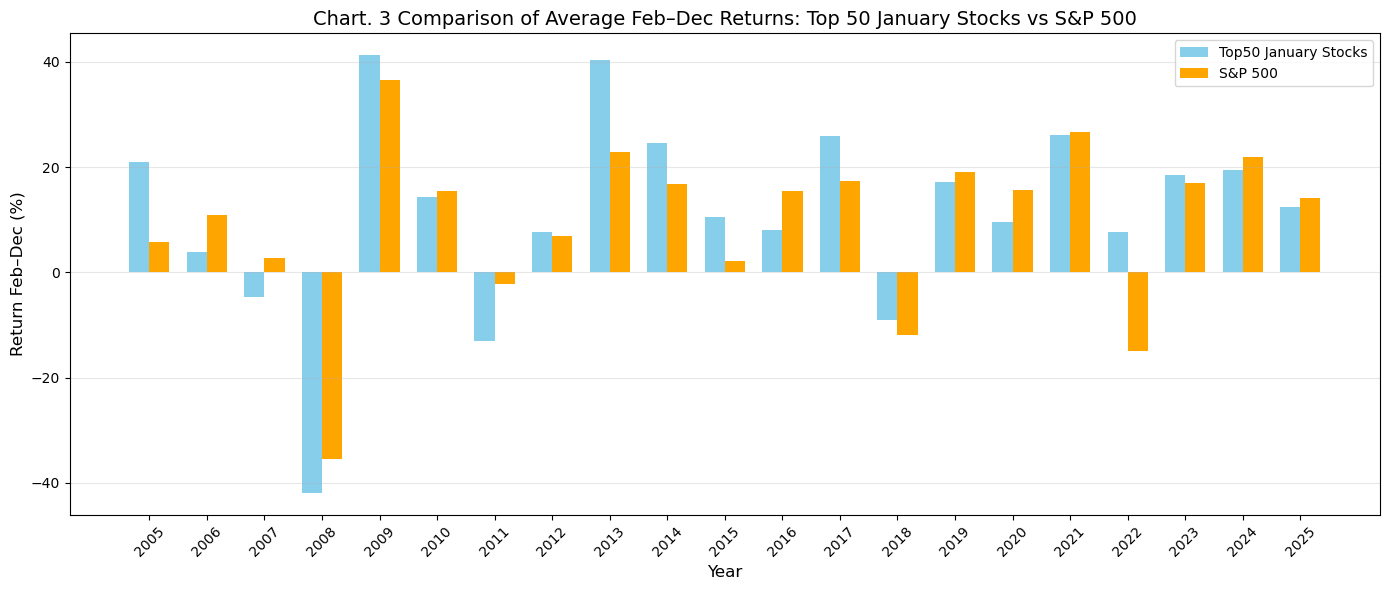

In [31]:
x = comparison_df["year"]
top50_returns = comparison_df["Mean_Feb_to_Dec"]
sp500_returns = comparison_df["SP500_Feb_to_Dec"]

width = 0.35 

plt.figure(figsize=(14,6))

plt.bar(x - width/2, top50_returns, width=width, color='skyblue', label='Top50 January Stocks')

plt.bar(x + width/2, sp500_returns, width=width, color='orange', label='S&P 500')

plt.xlabel("Year", fontsize=12)
plt.ylabel("Return Feb–Dec (%)", fontsize=12)
plt.title("Chart. 3 Comparison of Average Feb–Dec Returns: Top 50 January Stocks vs S&P 500", fontsize=14)

plt.xticks(x, rotation=45)

plt.grid(axis='y', alpha=0.3)
plt.legend()
plt.tight_layout()

plt.show()

In [33]:
def get_jan_and_feb_dec_returns(ticker, years):
    results = []
    
    for year in years:
        start_prev_dec = f"{year-1}-12-01"
        end_year = f"{year}-12-31"
        end_jan = f"{year}-01-31"
        
        data = yf.download(ticker, start=start_prev_dec, end=end_year, progress=False)
        if data.empty:
            results.append({"year": year, "ticker": ticker, "Jan_return": None, "Feb_to_Dec_return": None})
            continue
        
        prev_dec_close_series = data.loc[data.index <= f"{year-1}-12-31", "Close"]
        if prev_dec_close_series.empty:
            prev_dec_close = None
        else:
            prev_dec_close = float(prev_dec_close_series.iloc[-1])
        
        jan_close_series = data.loc[data.index <= end_jan, "Close"]
        if jan_close_series.empty:
            jan_close = None
        else:
            jan_close = float(jan_close_series.iloc[-1])
        
        dec_close_series = data["Close"]
        if dec_close_series.empty:
            dec_close = None
        else:
            dec_close = float(dec_close_series.iloc[-1])
        
        if prev_dec_close is not None and jan_close is not None and dec_close is not None:
            jan_return = (jan_close / prev_dec_close - 1) * 100
            feb_to_dec_return = (dec_close / jan_close - 1) * 100
        else:
            jan_return = None
            feb_to_dec_return = None
        
        results.append({
            "year": year,
            "ticker": ticker,
            "Jan_return": jan_return,
            "Feb_to_Dec_return": feb_to_dec_return
        })
    
    return pd.DataFrame(results)

In [35]:
years = range(2012, 2026)

# S&P 500
sp500_df = get_jan_and_feb_dec_returns("^GSPC", years)

# Chiński indeks MCHI
msci_china = get_jan_and_feb_dec_returns("MCHI", years)

C:\Users\lukas\AppData\Local\Temp\ipykernel_6500\3387023597.py:9: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_prev_dec, end=end_year, progress=False)
C:\Users\lukas\AppData\Local\Temp\ipykernel_6500\3387023597.py:18: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  prev_dec_close = float(prev_dec_close_series.iloc[-1])
C:\Users\lukas\AppData\Local\Temp\ipykernel_6500\3387023597.py:24: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  jan_close = float(jan_close_series.iloc[-1])
C:\Users\lukas\AppData\Local\Temp\ipykernel_6500\3387023597.py:30: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  dec_close = float(dec_close_series.iloc

In [37]:
comparison_df = pd.merge(
    sp500_df, msci_china, 
    on="year", 
    suffixes=("_SP500", "_MSCI_China")
)

print(comparison_df)

    year ticker_SP500  Jan_return_SP500  Feb_to_Dec_return_SP500  \
0   2012        ^GSPC          4.358306                 6.859138   
1   2013        ^GSPC          5.042810                22.892843   
2   2014        ^GSPC         -3.558291                16.703793   
3   2015        ^GSPC         -3.104081                 3.427091   
4   2016        ^GSPC         -5.073532                15.389338   
5   2017        ^GSPC          1.788436                17.321741   
6   2018        ^GSPC          5.617870               -11.972125   
7   2019        ^GSPC          7.868440                19.126139   
8   2020        ^GSPC         -0.162809                15.703515   
9   2021        ^GSPC         -1.113666                28.659699   
10  2022        ^GSPC         -5.258517               -14.971594   
11  2023        ^GSPC          6.175286                17.005101   
12  2024        ^GSPC          1.589571                21.901913   
13  2025        ^GSPC          2.701630         

In [41]:
# łączymy dane w jedną tabelę
comparison_df = pd.merge(
    sp500_df, msci_china, 
    on="year", 
    suffixes=("_SP500", "_MSCI_China")
)

In [43]:
comparison_df

,year,ticker_SP500,Jan_return_SP500,Feb_to_Dec_return_SP500,ticker_MSCI_China,Jan_return_MSCI_China,Feb_to_Dec_return_MSCI_China
0,2012,^GSPC,4.358306,6.859138,MCHI,9.818550,10.045767
1,2013,^GSPC,5.042810,22.892843,MCHI,2.226788,-1.099632
2,2014,^GSPC,-3.558291,16.703793,MCHI,-8.938170,15.529529
3,2015,^GSPC,-3.104081,3.427091,MCHI,0.338434,-9.017406
4,2016,^GSPC,-5.073532,15.389338,MCHI,-11.967726,13.227815
5,2017,^GSPC,1.788436,17.321741,MCHI,7.500581,43.878027
6,2018,^GSPC,5.617870,-11.972125,MCHI,12.428628,-28.436835
7,2019,^GSPC,7.868440,19.126139,MCHI,12.713804,9.611093
8,2020,^GSPC,-0.162809,15.703515,MCHI,-6.210001,36.155156
9,2021,^GSPC,-1.113666,28.659699,MCHI,8.089417,-27.160521


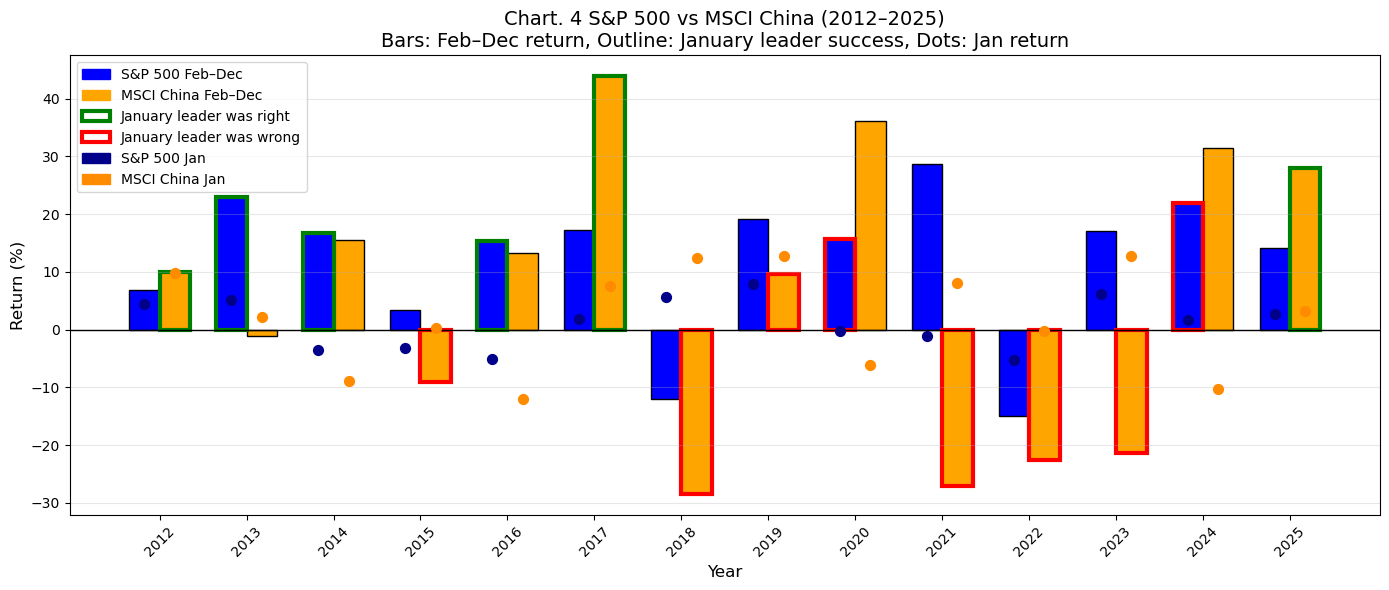

In [45]:
width = 0.35 

plt.figure(figsize=(14,6))

for i, row in comparison_df.iterrows():
    x = row["year"]
    
    plt.bar(
        x - width/2,
        row["Feb_to_Dec_return_SP500"],
        width=width,
        color='blue',
        edgecolor='black',
        label='S&P 500 Feb–Dec' if i==0 else ""
    )
    plt.bar(
        x + width/2,
        row["Feb_to_Dec_return_MSCI_China"],
        width=width,
        color='orange',
        edgecolor='black',
        label='MSCI China Feb–Dec' if i==0 else ""
    )
    
    if row["Jan_return_SP500"] > row["Jan_return_MSCI_China"]:
        edge_color = 'green' if row["Feb_to_Dec_return_SP500"] > row["Feb_to_Dec_return_MSCI_China"] else 'red'
        plt.bar(
            x - width/2,
            row["Feb_to_Dec_return_SP500"],
            width=width,
            fill=False,
            edgecolor=edge_color,
            linewidth=3
        )
    else:
        edge_color = 'green' if row["Feb_to_Dec_return_MSCI_China"] > row["Feb_to_Dec_return_SP500"] else 'red'
        plt.bar(
            x + width/2,
            row["Feb_to_Dec_return_MSCI_China"],
            width=width,
            fill=False,
            edgecolor=edge_color,
            linewidth=3
        )
    
    plt.scatter(
        x - width/2,
        row["Jan_return_SP500"],
        color='darkblue',
        s=50,
        zorder=5
    )
    plt.scatter(
        x + width/2,
        row["Jan_return_MSCI_China"],
        color='darkorange',
        s=50,
        zorder=5
    )

plt.axhline(0, color='black', linewidth=1)

plt.xlabel("Year", fontsize=12)
plt.ylabel("Return (%)", fontsize=12)
plt.title(
    "Chart. 4 S&P 500 vs MSCI China (2012–2025)\n"
    "Bars: Feb–Dec return, Outline: January leader success, Dots: Jan return",
    fontsize=14
)

plt.xticks(comparison_df["year"], rotation=45)
plt.grid(axis='y', alpha=0.3)

legend_elements = [
    mpatches.Patch(color='blue', label='S&P 500 Feb–Dec'),
    mpatches.Patch(color='orange', label='MSCI China Feb–Dec'),
    mpatches.Patch(facecolor='none', edgecolor='green', linewidth=3, label='January leader was right'),
    mpatches.Patch(facecolor='none', edgecolor='red', linewidth=3, label='January leader was wrong'),
    mpatches.Patch(color='darkblue', label='S&P 500 Jan'),
    mpatches.Patch(color='darkorange', label='MSCI China Jan')
]
plt.legend(handles=legend_elements, loc='upper left', fontsize=10)

plt.tight_layout()
plt.show()

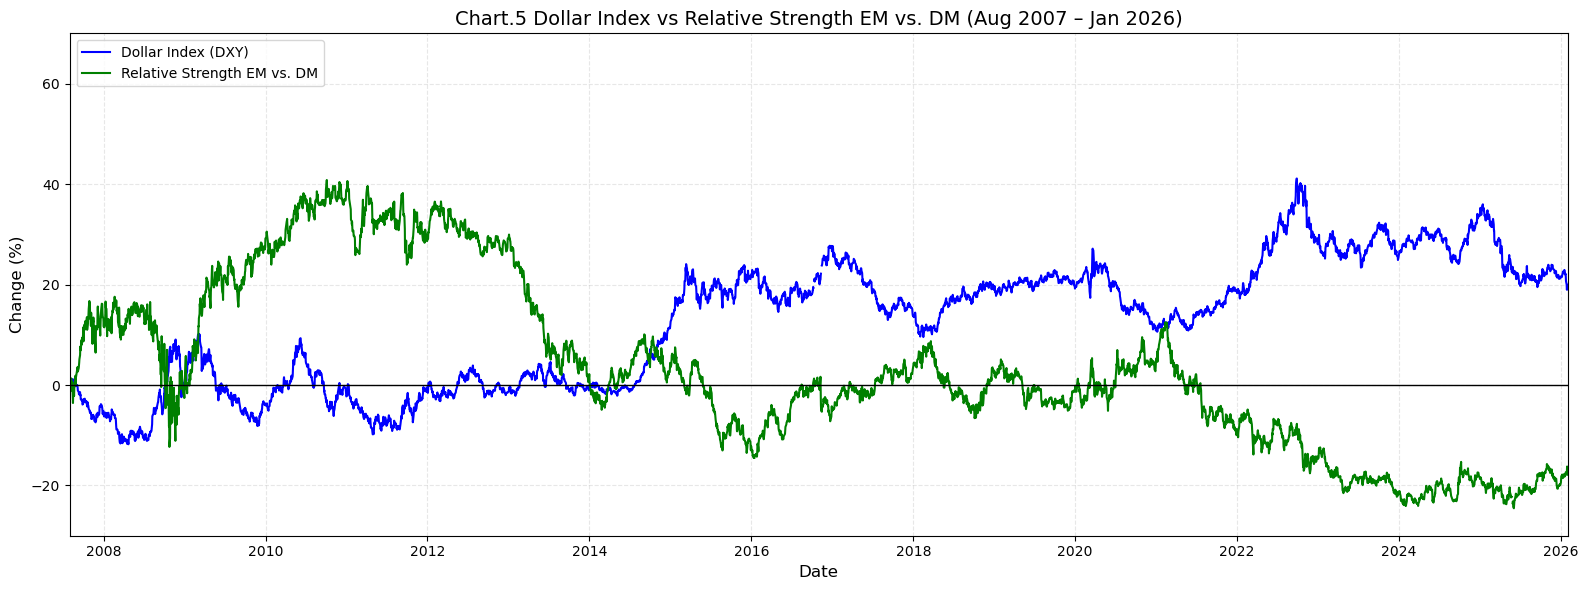

In [47]:
tickers = ["EEM", "VEA", "DX-Y.NYB"]
start_date = "2007-08-01"
end_date = "2026-01-31"

data = yf.download(
    tickers=tickers,
    start=start_date,
    end=end_date,
    auto_adjust=True,
    progress=False
)["Close"]

dollar_norm = (data["DX-Y.NYB"] / data["DX-Y.NYB"].iloc[0] - 1) * 100

relative_strength_norm = ((data["EEM"] / data["VEA"]) / (data["EEM"].iloc[0] / data["VEA"].iloc[0]) - 1) * 100

plt.figure(figsize=(16,6))

plt.plot(dollar_norm.index, dollar_norm, color='blue', label='Dollar Index (DXY)')
plt.plot(relative_strength_norm.index, relative_strength_norm, color='green', label='Relative Strength EM vs. DM')

plt.axhline(0, color='black', linewidth=1)

plt.ylabel("Change (%)", fontsize=12)
plt.ylim(-30, 70)
plt.xlabel("Date", fontsize=12)
plt.title("Chart.5 Dollar Index vs Relative Strength EM vs. DM (Aug 2007 – Jan 2026)", fontsize=14)

plt.xlim(pd.Timestamp("2007-08-01"), pd.Timestamp("2026-01-31"))

plt.legend(loc='upper left')
plt.grid(True, linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()

In [53]:
sp500_df = pd.read_csv("sp500_ticker_start_end_updated_2025_12.csv")

sp500_active = sp500_df[(sp500_df["end_date"].isna()) | (sp500_df["end_date"] >= "2026-01-01")]
sp500_tickers = sp500_active["ticker"].tolist()

if len(sp500_tickers) == 0:
    raise ValueError("Brak aktywnych spółek do pobrania danych!")

start = "2025-12-01"
end = "2026-02-10"

data = yf.download(
    tickers=sp500_tickers,
    start=start,
    end=end,
    auto_adjust=True,
    progress=True
)["Close"]

def last_price_in_month(series, year, month):
    sel = series.loc[(series.index.year == year) & (series.index.month == month)]
    if sel.empty:
        return np.nan
    return sel.iloc[-1]

results = []
for ticker in sp500_tickers:
    prices = data[ticker].dropna()
    if prices.empty:
        continue
    dec_close = last_price_in_month(prices, 2025, 12)
    jan_close = last_price_in_month(prices, 2026, 1)
    if pd.isna(dec_close) or pd.isna(jan_close):
        continue
    ret = (jan_close / dec_close - 1) * 100
    results.append((ticker, ret))

df_returns = pd.DataFrame(results, columns=["ticker", "Jan2026_return_pct"])
df_returns = df_returns.sort_values(by="Jan2026_return_pct", ascending=False).reset_index(drop=True)

[*********************100%***********************]  506 of 506 completed

7 Failed downloads:
['FI', 'PARA', 'IPG', 'ANSS']: YFPricesMissingError('possibly delisted; no price data found  (1d 2025-12-01 -> 2026-02-10) (Yahoo error = "No data found, symbol may be delisted")')
['BRK.B', 'SQ']: YFTzMissingError('possibly delisted; no timezone found')
['BF.B']: YFPricesMissingError('possibly delisted; no price data found  (1d 2025-12-01 -> 2026-02-10)')


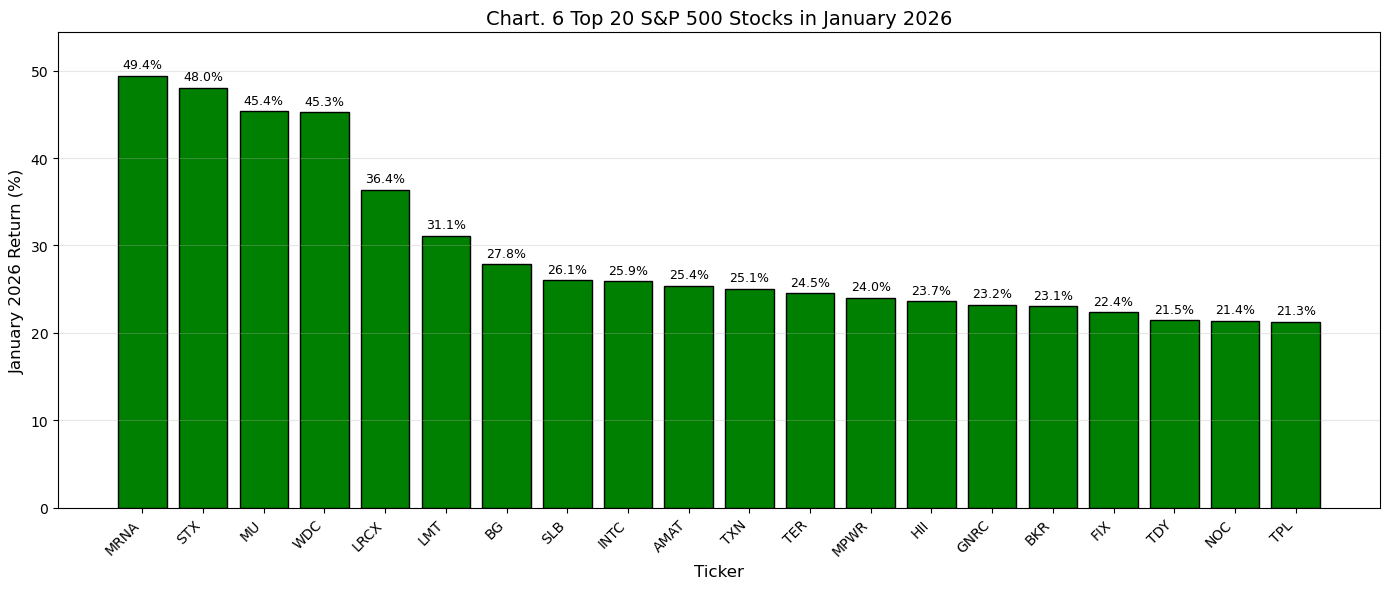

In [57]:
top20 = df_returns.head(20)

plt.figure(figsize=(14,6))
bars = plt.bar(top20["ticker"], top20["Jan2026_return_pct"], color='green', edgecolor='black')

for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,
        height + 0.5,
        f'{height:.1f}%',
        ha='center',
        va='bottom',
        fontsize=9
    )

plt.xlabel("Ticker", fontsize=12)
plt.ylabel("January 2026 Return (%)", fontsize=12)
plt.title("Chart. 6 Top 20 S&P 500 Stocks in January 2026", fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.ylim(0, max(top20["Jan2026_return_pct"])*1.1)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()